# Numerical Integration of Functions

## Introduction

Many physical laws are expressed as differential equations.
For example, Newton's second law,
\begin{align}
F = m \frac{d^2 x}{dt^2},
\end{align}
describes how a mass accelerates under a force.
More complex phenomena in fluid flow, electromagnetism, or quantum mechanics involve partial differential equations (PDEs).
Solving these usually requires integration over space, time, or both.
Because most real-world problems cannot be solved analytically, numerical methods are essential for approximating their solutions.

### Numerical Integration of Functions

To understand how to solve differential equations numerically, it helps to start with a simpler case: approximating a definite integral,
\begin{align}
I = \int_a^b f(x) \, dx.
\end{align}
This can be viewed as solving the initial-value problem
\begin{align}
\frac{dy}{dx} = f(x), \quad y(a) = 0,
\end{align}
where $y(b)$ represents the value of $\int_a^b f(x)\,dx$.
By studying basic numerical integration, we learn how approximations converge to the true value when we refine parameters such as step size.
These concepts of convergence and error control are crucial in more complex scenarios involving ordinary and partial differential equations.

### Analytical Example

To illustrate these ideas, consider a function whose integral we know: $f(x) = e^x$.
Its definite integral from $a$ to $b$ is
\begin{align}
\int_a^b f(x) \, dx = e^b - e^a.
\end{align}
We will use the interval $[0,1]$ so that the exact value is $e - 1$.
Comparing this known result to numerical approximations will help us validate our methods and understand how accuracy depends on step size.

Below is a simple plot of $e^x$ on $[0,1]$ for visual reference.

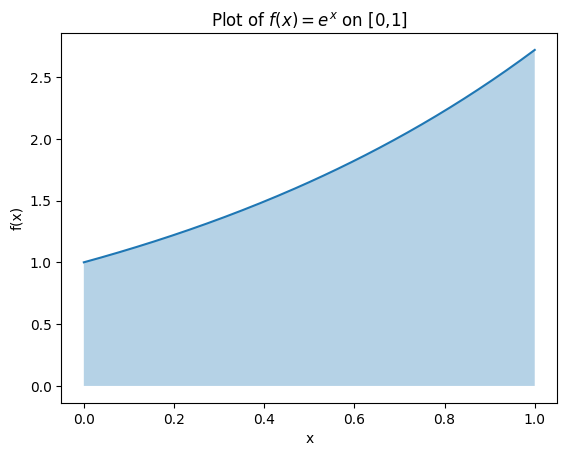

In [1]:
# Importing necessary libraries
import numpy as np
from matplotlib import pyplot as plt

# Define the function
def f(x):
    return np.exp(x)

# Define a fine grid for plotting
x = np.linspace(0, 1, 129)
y = f(x)

# Plotting the function
plt.plot(x, y)
plt.fill_between(x, y, alpha=0.33)
plt.title(r'Plot of $f(x) = e^x$ on [0,1]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Riemann Sums

The Riemann sum is a foundational idea even in calculus.
It partitions the interval $[a, b]$ into $n$ sub-intervals, each of width $\Delta x_i$. The approximate integral is:
\begin{align}
I \approx \sum_{i=1}^n f(x_i ) \Delta x_i,
\end{align}
where $x_i$ is a sample point in the $i$-th sub-interval.
Three common variations are:
- Left Riemann Sum: Sample at the left endpoint.
- Right Riemann Sum: Sample at the right endpoint.
- Middle Riemann Sum: Sample at the midpoint.

As the sub-interval width $\Delta x_i$ goes to zero (i.e., as $n\to\infty$), each Riemann sum converges to the exact integral, assuming $f$ is reasonably well behaved.

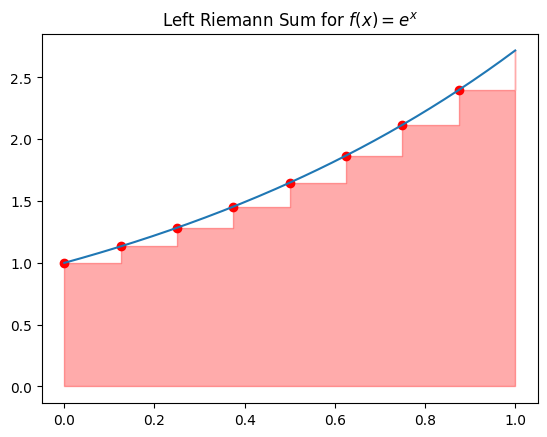

In [2]:
# Define a coarse grid for visualization
X = np.linspace(0, 1, 9)
Y = f(X)

# Plot Left Riemann Sum
plt.plot(x, y)
plt.scatter(X[:-1], Y[:-1], color='r')
plt.fill_between(X, Y, step='post', color='r', alpha=0.33)
plt.title('Left Riemann Sum for $f(x) = e^x$')
plt.show()

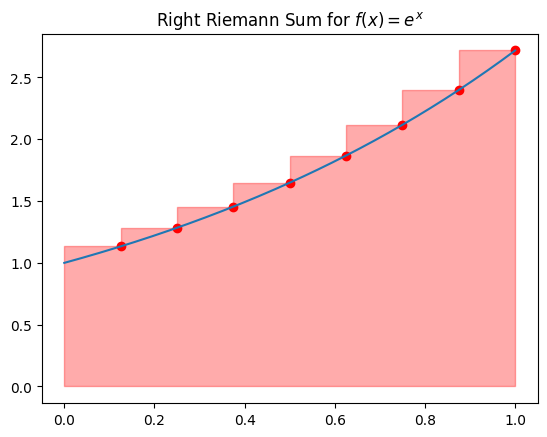

In [3]:
# Plot Right Riemann Sum
plt.plot(x, y)
plt.scatter(X[1:], Y[1:], color='r')
plt.fill_between(X, Y, step='pre', color='r', alpha=0.33)
plt.title('Right Riemann Sum for $f(x) = e^x$')
plt.show()

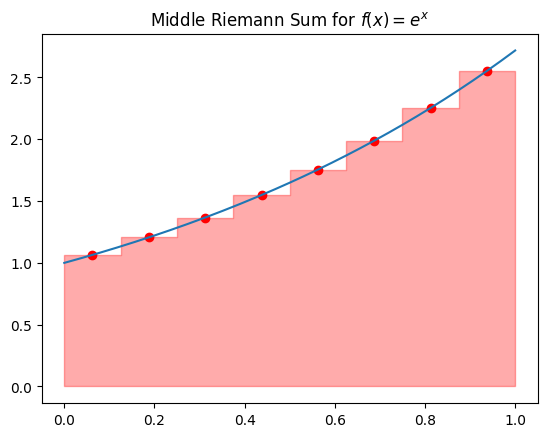

In [4]:
# Plot Middle Riemann Sum
X_mid = 0.5 * (X[:-1] + X[1:])
Y_mid = f(X_mid)

plt.plot(x, y)
plt.scatter(X_mid, Y_mid, color='r')
plt.fill_between(np.concatenate([[0], X_mid, [1]]),
                 np.concatenate([Y_mid[:1], Y_mid, Y_mid[-1:]]),
                 step='mid', color='r', alpha=0.33)
plt.title('Middle Riemann Sum for $f(x) = e^x$')
plt.show()

### Computing Riemann Sums

Next, let’s implement each Riemann sum and compare their errors to the true value $I = e-1$.

In [5]:
# Left Riemann Sum calculation
N = 8
D = 1 / N
X_left = [D * i for i in range(N)]
S_left = np.sum(f(X_left)) * D

print('Left Riemann Sum:', S_left)

# Exact solution
I = f(1) - f(0)
print('Analytical solution:', I)

# Error analysis
aerr_left = abs(I - S_left)
rerr_left = abs((I - S_left) / I)
print('Absolute error:', aerr_left)
print(f'Relative error: {100 * rerr_left:.2f} %')

Left Riemann Sum: 1.6131259778856117
Analytical solution: 1.718281828459045
Absolute error: 0.10515585057343335
Relative error: 6.12 %


In [6]:
# Right Riemann Sum calculation
X_right = [D * (i + 1) for i in range(N)]
S_right = np.sum(f(X_right)) * D

print('Right Riemann Sum:', S_right)

# Error analysis
aerr_right = abs(I - S_right)
rerr_right = abs((I - S_right) / I)
print('Absolute error:', aerr_right)
print(f'Relative error: {100 * rerr_right:.2f} %')

Right Riemann Sum: 1.827911206442992
Absolute error: 0.10962937798394701
Relative error: 6.38 %


In [7]:
# Middle Riemann Sum calculation
X_mid = [D * (i + 0.5) for i in range(N)]
S_mid = np.sum(f(X_mid)) * D

print('Middle Riemann Sum:', S_mid)

# Error analysis
aerr_mid = abs(I - S_mid)
rerr_mid = abs((I - S_mid) / I)
print('Absolute error:', aerr_mid)
print(f'Relative error: {100 * rerr_mid:.2f} %')

Middle Riemann Sum: 1.717163664995687
Absolute error: 0.001118163463358135
Relative error: 0.07 %


We often find that the middle Riemann sum is more accurate than the left or right, even though each uses the same number of points.
This illustrates how the choice of sample point can impact accuracy.

### Convergence of Riemann Sums

In numerical integration, convergence describes how closely a numerical approximation approaches the exact value of an integral as the number of sample points increases.
To illustrate convergence, we will analyze the errors in different types of Riemann sums (left, right, and middle) as we increase the number of sampling points.

To streamline our code, let's define a function `RiemannSum()` that allows us to compute the Riemann sum for any function $f$ using different sample points (left, right, or middle) and varying the number of intervals.

In [8]:
# General function for Riemann sum calculation
def RiemannSum(f, N=8, a=0, b=1, t='mid'):
    """Compute Riemann sum for function $f$ from $a$ to $b$ using $N$ points.

    Parameters:
      f: function to be ingegrated
      N: number of subdivision
      a: lower limit
      b: upper limit
      t: type of Riemann sum, can be `mid` (middle), `left`, or `right`.
    """
    D = (b - a) / N  # Step size
    if t[0] == 'l':
        X = [D * i + a for i in range(N)]
    elif t[0] == 'r':
        X = [D * (i + 1) + a for i in range(N)]
    else:
        X = [D * (i + 0.5) + a for i in range(N)]
    return np.sum(f(np.array(X))) * D

We'll use varying numbers of sampling points $N$ and compute the absolute error for each Riemann sum type compared to the true integral value.
Below, we test this with the function $f(x) = e^x$ again.

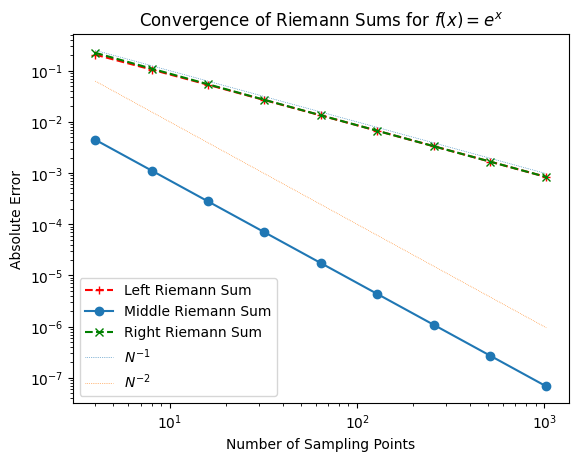

In [9]:
# Define range of sampling points
Ns = np.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])

# True value of the integral for comparison
I = np.exp(1) - 1

# Calculate errors for left, middle, and right Riemann sums
err_l = [abs(RiemannSum(f, N, t='l') - I) for N in Ns]
err_m = [abs(RiemannSum(f, N, t='m') - I) for N in Ns]
err_r = [abs(RiemannSum(f, N, t='r') - I) for N in Ns]

# Plotting the convergence results
plt.loglog(Ns, err_l, '+--', color='r',  label='Left Riemann Sum')
plt.loglog(Ns, err_m, 'o-',  color='C0', label='Middle Riemann Sum')
plt.loglog(Ns, err_r, 'x--', color='g',  label='Right Riemann Sum')
plt.loglog(Ns, Ns**(-1.0), ':', lw=0.5, label=r'$N^{-1}$')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Convergence of Riemann Sums for $f(x) = e^x$')
plt.show()

From this plot, we see that:
- Left and Right Riemann sums typically converge at a rate proportional to $N^{-1}$.
- Middle Riemann sum often achieves about $N^{-2}$ convergence, making it more accurate at lower $N$.


### Testing Convergence with Different Functions

To determine if this trend holds generally, let’s repeat the convergence test with different functions: a half-cycle of $\sin(x)$ and a quarter circle $\sqrt{1 - x^2}$.

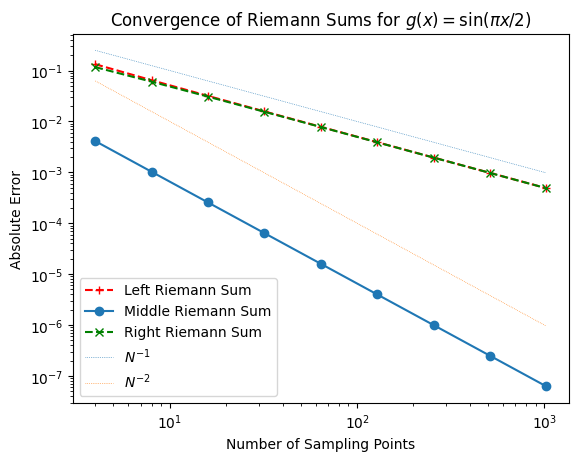

In [10]:
# Define a half-cycle of sin(x)
def g(x):
    return np.sin(x * np.pi / 2)

# Calculate errors for each Riemann sum type
err_l = [abs(RiemannSum(g, N, t='l') - 2 / np.pi) for N in Ns]
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_r = [abs(RiemannSum(g, N, t='r') - 2 / np.pi) for N in Ns]

# Plotting the convergence results
plt.loglog(Ns, err_l, '+--', color='r',  label='Left Riemann Sum')
plt.loglog(Ns, err_m, 'o-',  color='C0', label='Middle Riemann Sum')
plt.loglog(Ns, err_r, 'x--', color='g',  label='Right Riemann Sum')
plt.loglog(Ns, Ns**(-1.0), ':', lw=0.5, label=r'$N^{-1}$')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title(r'Convergence of Riemann Sums for $g(x) = \sin(\pi x / 2)$')
plt.show()

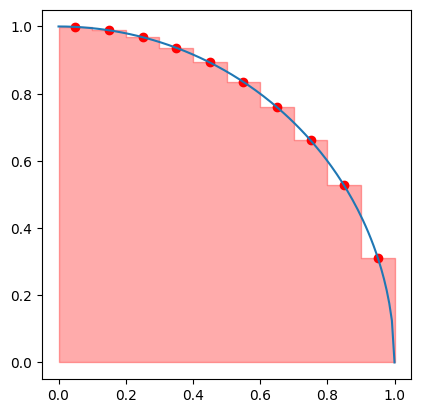

In [11]:
def h(x):
    return np.sqrt(1 - x * x)

X = np.linspace(0, 1, 11)
X = 0.5 * (X[:-1] + X[1:])
Y = h(X)

plt.plot(x, h(x))
plt.scatter(X, Y, color='r')
plt.fill_between(np.concatenate([[0], X, [1]]),
                 np.concatenate([Y[:1], Y, Y[-1:]]),
                 step='mid', color='r', alpha=0.33)
plt.gca().set_aspect('equal')

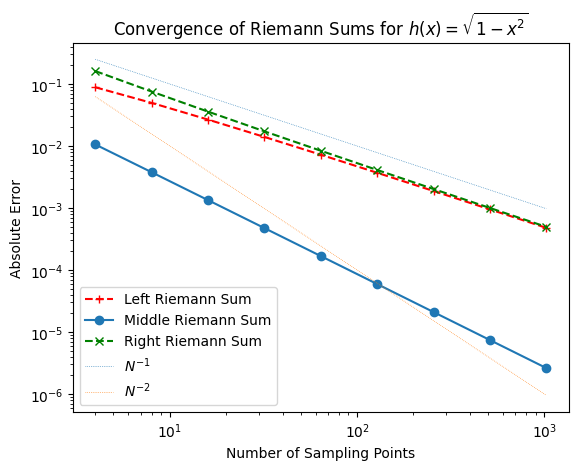

In [12]:
# Define a quarter circle function
def h(x):
    return np.sqrt(1 - x**2)

# Calculate errors for each Riemann sum type
err_l = [abs(RiemannSum(h, N, t='l') - np.pi / 4) for N in Ns]
err_m = [abs(RiemannSum(h, N, t='m') - np.pi / 4) for N in Ns]
err_r = [abs(RiemannSum(h, N, t='r') - np.pi / 4) for N in Ns]

# Plotting the convergence results
plt.loglog(Ns, err_l, '+--', color='r',  label='Left Riemann Sum')
plt.loglog(Ns, err_m, 'o-',  color='C0', label='Middle Riemann Sum')
plt.loglog(Ns, err_r, 'x--', color='g',  label='Right Riemann Sum')
plt.loglog(Ns, Ns**(-1.0), ':', lw=0.5, label=r'$N^{-1}$')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title(r'Convergence of Riemann Sums for $h(x) = \sqrt{1 - x^2}$')
plt.show()

Although the specific error values vary across different functions, the general trends in convergence remain consistent.
Doubling the number of sampling points, or equivalently halving the step size, reduces the error in the left and right Riemann sums by roughly half.
By comparison, the middle Riemann sum achieves a fourfold reduction in error for each doubling of sampling points, indicating a faster rate of convergence.
This suggests that, overall, the middle Riemann sum converges more rapidly than the left and right sums.

As we move forward, we will adopt the notation and methods used in Numerical Recipes. These approaches will provide greater flexibility and accuracy, enabling us to tackle more complex integration problems more effectively.

In general, we observe that:
* For the left and right Riemann sums, doubling the number of sampling points halves the error. This is an example of **first-order convergence**.
* For the middle Riemann sum, doubling the number of sampling points reduces the error by a factor of four, indicating **second-order convergence**.

However, these formal convergent rates may not hold for specific functions $f$.

## Classical Formulas for Equally Spaced Abscissas

### Trapezoidal Rule

To improve our numerical integration, we will transition from the Riemann sum approach to the **trapezoidal rule**.
From now on, we'll adopt a "vertex" formulation for points, where $x_i = a + i \Delta x$ and $\Delta x = (b - a)/N$.

The trapezoidal rule approximates the area under a curve by treating each segment as a trapezoid.
For a single interval $[x_0, x_1]$, we approximate:
\begin{align}
\int_{x_0}^{x_1} f(x) \, dx \approx h \left( \frac{1}{2} f(x_0) + \frac{1}{2} f(x_1) \right) + \mathcal{O}(h^3 f'')
\end{align}
where $h = x_1 - x_0$.
This error term indicates that the true value differs by an amount proportional to $h^3$ and $f''$, making it second-order accurate.
If $f$ is linear (i.e., $f'' = 0$), the trapezoidal approximation is exact.

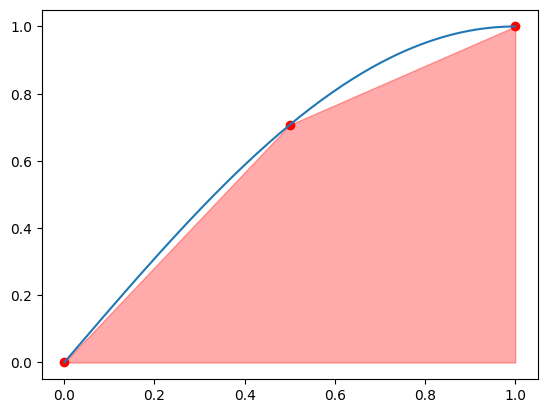

In [13]:
# Test with different functions, this is a quarter circle

X = np.linspace(0, 1, 3)
Y = g(X)

plt.plot(x, g(x))
plt.scatter(X, Y, color='r')
plt.fill_between(X, g(X), color='r', alpha=0.33)

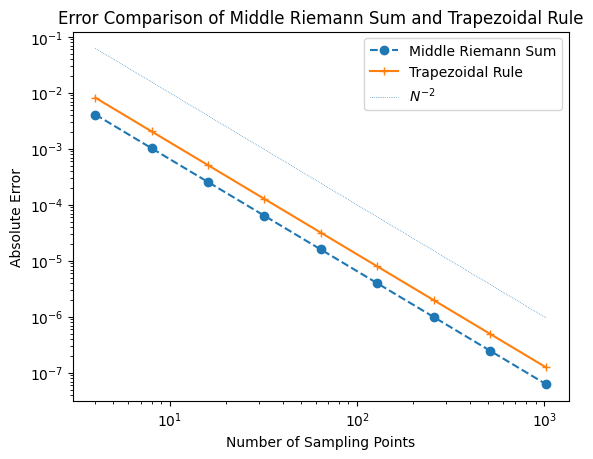

In [14]:
# Trapezoidal rule implementation
def trapezoidal(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    return np.sum(f(X[1:]) + f(X[:-1])) * 0.5 * D

# Compare errors of middle Riemann sum and trapezoidal rule
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_t = [abs(trapezoidal(g, N) - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o--', color='C0', label='Middle Riemann Sum')
plt.loglog(Ns, err_t, '+-',  color='C1', label='Trapezoidal Rule')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Comparison of Middle Riemann Sum and Trapezoidal Rule')
plt.show()

### Simpson's Rule

The trapezoidal rule is exact for linear functions.
Naturally, we may wonder if there's a method exact for quadratic functions.
This leads us to Simpson's Rule.

There are many ways to derive the Simpson's Rule.
For simplicity, let's "center" the integral at 0 and set the lower and upper limits to $-h$ and $h$.
The integrate to approximated is therefore:
\begin{align}
\int_{-h}^h f(x) dx 
&\approx \int_{-h}^h (Ax^2 + Bx + C) dx \\
&= \left[A\frac{x^3}{3} + B\frac{x^2}{2} + Cx\right]_{-h}^h \\
&= 2h\left(A\frac{h^2}{3} + C\right)
\end{align}

The coefficient $A$ and $C$ can be trivial obtain by noting:
\begin{align}
f( h) &= Ah^2 + Bh + C, \\
f( 0) &= C, \\
f(-h) &= Ah^2 - Bh + C.
\end{align}
Adding the first and third equations,
\begin{align}
f(h) + f(-h) = 2(A h^2 + C) \Rightarrow A h^2 = \frac{f(h) + f(-h)}{2} - C.
\end{align}
Substituting $A$ and $C$ back to the integral, we have
\begin{align}
\int_{-h}^h f(x) dx \approx \frac{h}{3}[f(h) + 4 f(0) + f(-h)].
\end{align}

Restoring the limits, Simpson's rule approximates the integral over two intervals $[x_0, x_2]$ yields:
\begin{align}
\int_{x_0}^{x_2} f(x) \, dx \approx \frac{h}{3} \left[f(x_0) + 4f(x_1) + f(x_2)\right] + \mathcal{O}(h^5 f^{(4)})
\end{align}
where $h = \frac{x_2 - x_0}{2}$ and $x_1 = \frac{x_0 + x_2}{2}$.
This error term indicates that Simpson's Rule is fourth-order accurate---even when using quadratic approximations, we achieve convergence as though we were using fourth-degree terms.

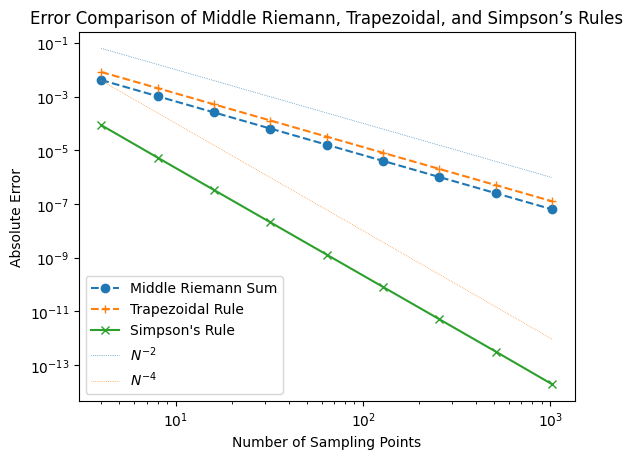

In [16]:
# Simpson's rule implementation
def simpson(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N // 2):
        l = X[2 * i]
        m = X[2 * i + 1]
        r = X[2 * i + 2]
        S += D * (f(l) + 4 * f(m) + f(r)) / 3
    return S

# Compare errors of middle Riemann, trapezoidal, and Simpson's rule
err_S = [abs(simpson(g, N) - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o--', color='C0', label='Middle Riemann Sum')
plt.loglog(Ns, err_t, '+--', color='C1', label='Trapezoidal Rule')
plt.loglog(Ns, err_S, 'x-',  color='C2', label="Simpson's Rule")
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.loglog(Ns, Ns**(-4.0), ':', lw=0.5, label=r'$N^{-4}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Comparison of Middle Riemann, Trapezoidal, and Simpson’s Rules')
plt.show()

### Bode's Rule

Simpson's rule is exact for quadratic polynomials, but what if we want a rule that is exact for quartic polynomials?
Bode's Rule addresses this, using a polynomial fit across four intervals to achieve even higher accuracy.

Bode's rule integrates over four intervals, providing an approximation that is exact for polynomials up to degree four:
\begin{align}
\int_{x_0}^{x_4} f(x) , dx \approx h \left( \frac{14}{45} f(x_0) + \frac{64}{45} f(x_1) + \frac{24}{45} f(x_2) + \frac{64}{45} f(x_3) + \frac{14}{45} f(x_4) \right) + \mathcal{O}(h^7 f^{(6)})
\end{align}
where $h = (x_4 - x_0)/4$.
This method is sixth-order accurate, meaning it converges more quickly than Simpson's Rule for smooth functions.

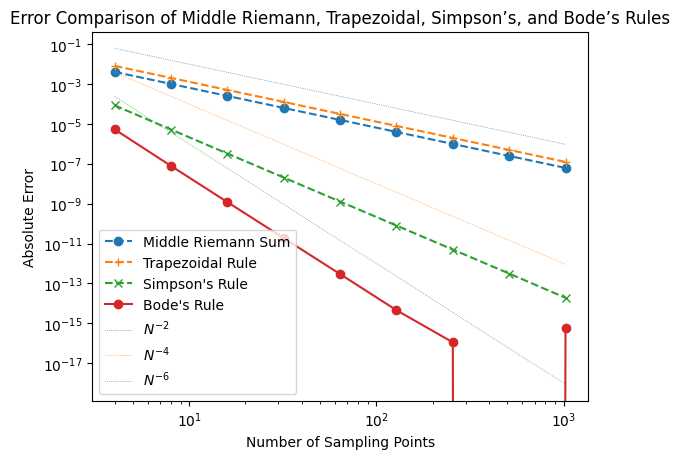

In [17]:
# Bode's rule implementation
def bode(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N // 4):
        x0 = X[4 * i]
        x1 = X[4 * i + 1]
        x2 = X[4 * i + 2]
        x3 = X[4 * i + 3]
        x4 = X[4 * i + 4]
        S += D * (14 * f(x0) + 64 * f(x1) + 24 * f(x2) + 64 * f(x3) + 14 * f(x4)) / 45
    return S

# Compare errors of middle Riemann, trapezoidal, Simpson's, and Bode's rule
err_B = [abs(bode(g, N) - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o--',  color='C0', label='Middle Riemann Sum')
plt.loglog(Ns, err_t, '+--',  color='C1', label='Trapezoidal Rule')
plt.loglog(Ns, err_S, 'x--',  color='C2', label="Simpson's Rule")
plt.loglog(Ns, err_B, 'o-',   color='C3', label="Bode's Rule")
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.loglog(Ns, Ns**(-4.0), ':', lw=0.5, label=r'$N^{-4}$')
plt.loglog(Ns, Ns**(-6.0), ':', lw=0.5, label=r'$N^{-6}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Comparison of Middle Riemann, Trapezoidal, Simpson’s, and Bode’s Rules')
plt.show()

## Gaussian Quadrature

In previous lectures, we went through numerical methods that uses high-order polynomial to approximate a function.
These high-order methods enable exponential convergence for interpolation and derivatives.

Exponentially converging methods also exists for numerical integration.
They are called Gaussian quadratures.
Unlike methods such as the trapezoidal or Simpson's rule, which evaluate the function at equally spaced points, Gaussian quadrature selects **optimal** points and corresponding weights to achieve exact integration for polynomials up to a certain degree.

To make the derivation easier to follow, we set the interval of integration to $[-1,1]$.
The key idea behind Gaussian quadrature is to approximate an integral of the form:
\begin{align}
I = \int_{-1}^{1} f(x)\,dx
\end{align}
by a weighted sum:
\begin{align}
I \approx \sum_{i=1}^{n} w_i f(x_i),
\end{align}
where the nodes $x_i$ and weights $w_i$ are carefully chosen to maximize accuracy.

Note that the classical formulas introduced above are special cases with equidistant sampling points.

Gaussian quadrature is constructed such that it **exactly** integrates polynomials of degree up to $2n - 1$ using only $n$ function evaluations.
To derive the optimal nodes and weights, we enforce this exactness condition.

The optimal nodes $x_i$ in Gaussian quadrature are chosen as the **roots of the Legendre polynomial** $P_n(x)$, where $P_n(x)$ is the $n$th-degree Legendre polynomial.
These polynomials satisfy the **orthogonality relation**:
\begin{align}
\int_{-1}^{1} P_m(x) P_n(x) \, dx = 0 \quad \text{for } m \neq n.
\end{align}
This orthogonality property plays a crucial role in minimizing the integration error.

Once the nodes $x_i$ are determined, the weights $w_i$ are found using the formula:
\begin{align}
w_i = \frac{2}{(1 - x_i^2) [P_n'(x_i)]^2}.
\end{align}
Here, $P_n'(x_i)$ is the derivative of the Legendre polynomial evaluated at the root $x_i$.


Although Gaussian quadrature is typically defined on the standard interval $[-1,1]$.
To integrate over an arbitrary interval $[a, b]$, we simply apply the transformation:
\begin{align}
t = \frac{b-a}{2} x + \frac{b+a}{2}.
\end{align}
This maps the integration from $[-1,1]$ to $[a, b]$, introducing a factor of $\frac{b-a}{2}$ in the integral:
\begin{align}
\int_a^b f(t) dt = \frac{b-a}{2} \int_{-1}^{1} f\left( \frac{b-a}{2} x + \frac{b+a}{2} \right) dx.
\end{align}
Applying Gaussian quadrature, the integral is approximated as:
\begin{align}
\int_a^b f(x) dx \approx \frac{b-a}{2} \sum_{i=1}^{n} w_i f\left( \frac{b-a}{2} x_i + \frac{b+a}{2} \right).
\end{align}

To implement Gaussian Quadrature in python, we will use `numpy.polynomial.legendre.leggauss` to obtain the Gaussian quadrature nodes and weights.

In [18]:
def GQ(f, a, b, n):
    """
    Perform Gaussian quadrature on function f over interval [a, b] using n points.
    """
    # Get nodes and weights for Legendre polynomials
    x, w = np.polynomial.legendre.leggauss(n)
    
    # Transform nodes from [-1,1] to [a,b]
    t = 0.5 * (b - a) * x + 0.5 * (b + a)
    
    # Compute weighted sum
    return 0.5 * (b - a) * np.sum(w * f(t))

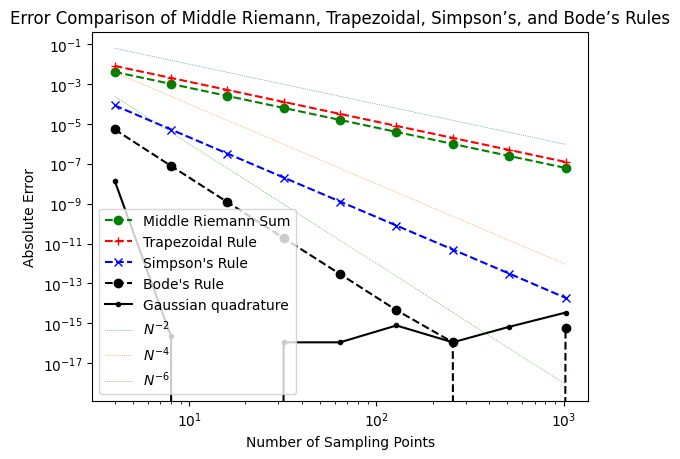

In [19]:
# Compare errors of middle Riemann, trapezoidal, Simpson's, and Bode's rule
err_GQ = [abs(GQ(g, 0, 1, N) - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o--',  color='g',  label='Middle Riemann Sum')
plt.loglog(Ns, err_t, '+--',  color='r',  label='Trapezoidal Rule')
plt.loglog(Ns, err_S, 'x--',  color='b',  label="Simpson's Rule")
plt.loglog(Ns, err_B, 'o--',  color='k',  label="Bode's Rule")
plt.loglog(Ns, err_GQ,'.-',   color='k',  label="Gaussian quadrature")
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.loglog(Ns, Ns**(-4.0), ':', lw=0.5, label=r'$N^{-4}$')
plt.loglog(Ns, Ns**(-6.0), ':', lw=0.5, label=r'$N^{-6}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Comparison of Middle Riemann, Trapezoidal, Simpson’s, and Bode’s Rules')
plt.show()

## Using Scipy and Sympy

Instead of implementing our own numerical schemes, in real research projects, it is more likely that you will use a state-of-art integrator from a well maintained package.

For numerical integration, `scipy` has a recently collection of integrators.

For symbolic integration, `sympy` is the standard choice.

In [20]:
# Scipy example for numerical integration

from scipy.integrate import quad

res, err = quad(lambda x: np.sqrt(1 - x * x), 0, 1)

print('Result:', res)
print('Error: ', err)

Result: 0.7853981633974481
Error:  8.833911380179416e-11


In [21]:
# Sympy example for symbolic integration

from sympy import Symbol, integrate, sqrt

x = Symbol('x')

integrate(sqrt(1 - x * x), x)

x*sqrt(1 - x**2)/2 + asin(x)/2

In [22]:
integrate(sqrt(1 - x * x), (x, 0, 1))

pi/4

## Final comments

* Based on the previous examples, by increasing the order of the approximations, it is possible to construct numerical integration that converges very rapidly.

* For double precision floating point values, the machine accruacy is $\sim 10^{-16}$.  We saw with Bode's rule, we are already reaching that limit for $\sim 256$ sampling points.

* For smooth functions, it is even possible to develop numerical integrators such as Gaussian quadrature that converge exponentially!

* Symbolic integration provided by, e.g., `sympy`, can also be a useful tool.

* However, if the function is not smooth, i.e., with discontinuity, then formally the convergent rate is only first order.
  Hence, refining the sampling points near the discontinuity is the only method to provide accurate integration.

* Also, the approximations we introduce in this lecture includes the *end points* of the function.
  It will be difficult to apply these numerical methods to, e.g., improper integral, or functions with singularity.

* In the lab, we will learn how to modify our integrators to exclude the end points, and use them for improper integral and functions with singularity.